In [1]:
import pandas as pd
autos = pd.read_csv(r"C:\Users\suyog\DataProcessing\data_set\autos.csv")

In [2]:
#Target Encoding also called as "SUPERVISED FEATURE ENGINEERING TECHNIQUE"
autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")
autos[["make", "price", "make_encoded"]].head()

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667


In [3]:
#Smoothing
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings

In [4]:
plt.rc("figure",autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv(r"C:\Users\suyog\DataProcessing\data_set\movielens1m.csv")
df = df.astype(np.uint8, errors='ignore')
print("Number o Unique Zipcodes: {}" . format(df["Zipcode"].nunique()))

Number o Unique Zipcodes: 3439


In [13]:
df.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4


In [11]:
df.shape

(1000209, 28)

In [6]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [16]:
#Apply M-Estimate Encoding
from category_encoders import MEstimateEncoder

#create the encoder instance. choose m  to control noise.
encoder = MEstimateEncoder(cols=["Zipcode"], m=5.0)

#fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

#Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

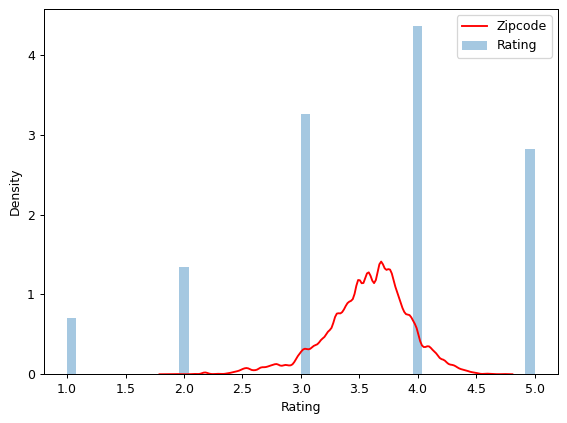

In [17]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);